# Data and Network Mining
## Application of Data Mining Tools&Techniques

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE


In [49]:
# Load the dataset
data = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Data Understanding

In [50]:
# Data Understanding
print("Dataset Shape:", data.shape)


Dataset Shape: (1470, 35)


In [51]:
print("\nData Overview:\n", data.head())


Data Overview:
    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOpti

In [52]:
print("\nData Info:\n")
data.info()


Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel   

In [53]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())



Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole    

In [54]:
# Statistical summary
print("\nStatistical Summary:\n", data.describe())



Statistical Summary:
                Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std       

In [55]:
# check duplicate rows
print("\nDuplicate Rows:\n", data.duplicated().sum())



Duplicate Rows:
 0


### Exploratory Data Analysis (EDA)

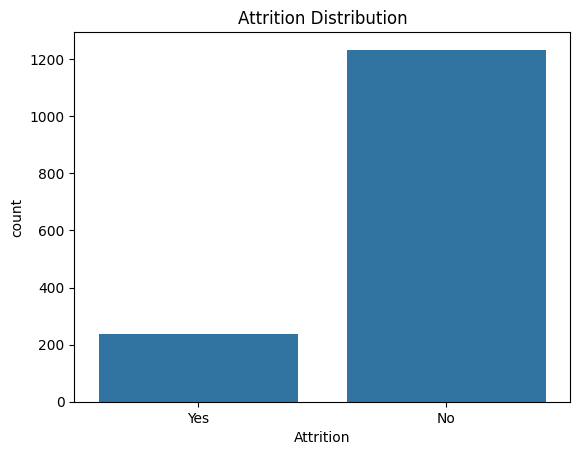

In [56]:
# Visualizing data distribution
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Distribution')
plt.show()

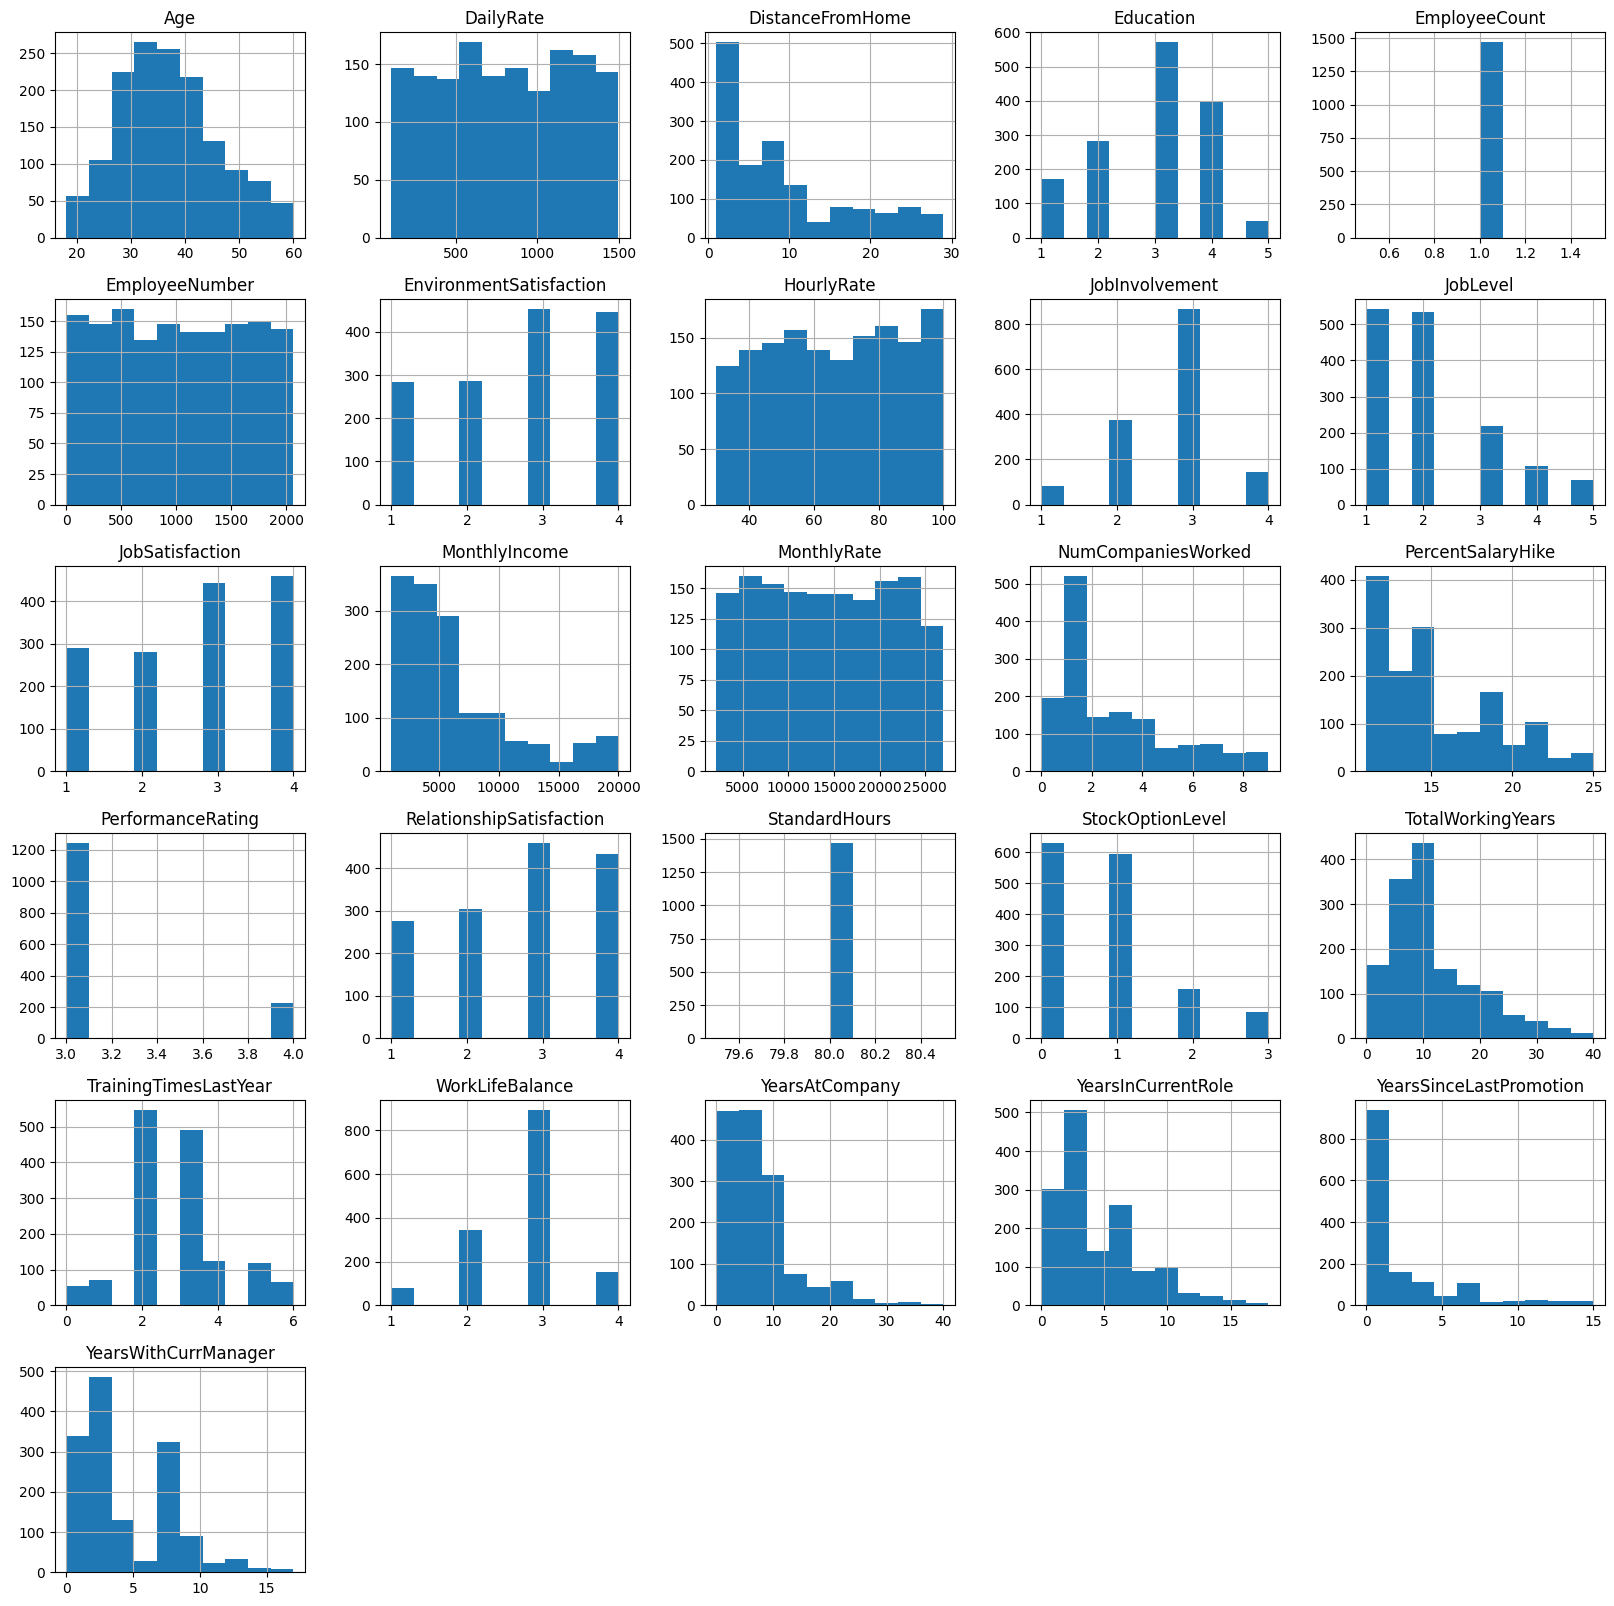

In [57]:
# Distribution of numerical features 
data.hist(figsize=(20, 20))
plt.show()

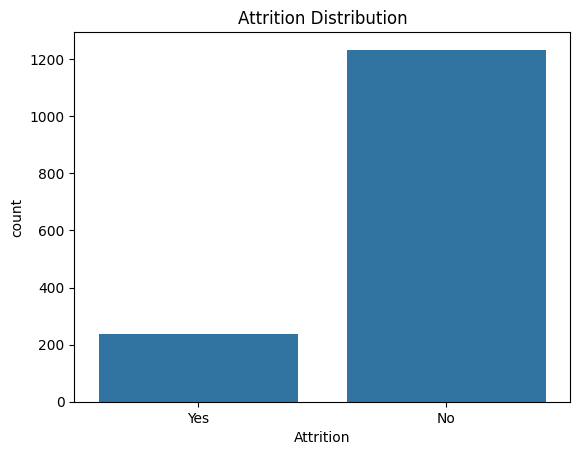

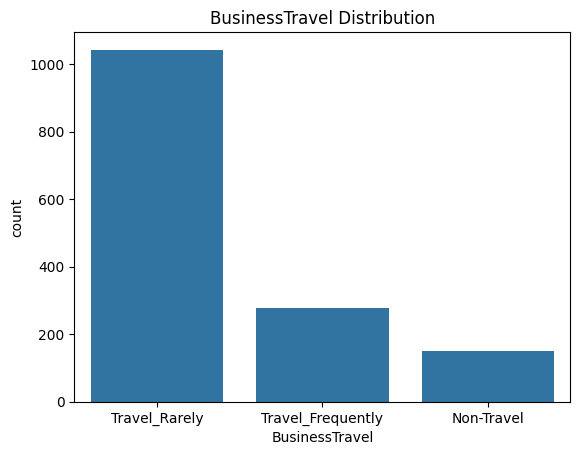

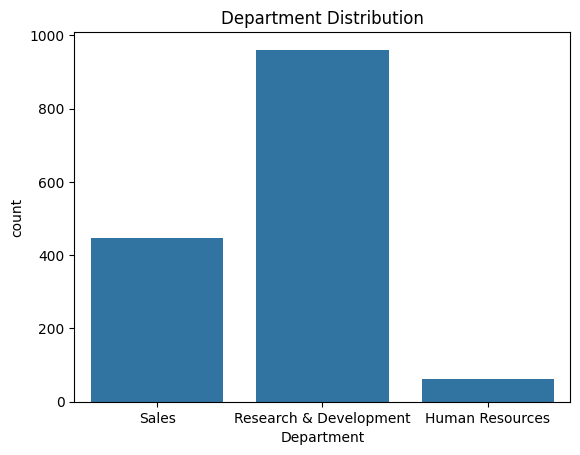

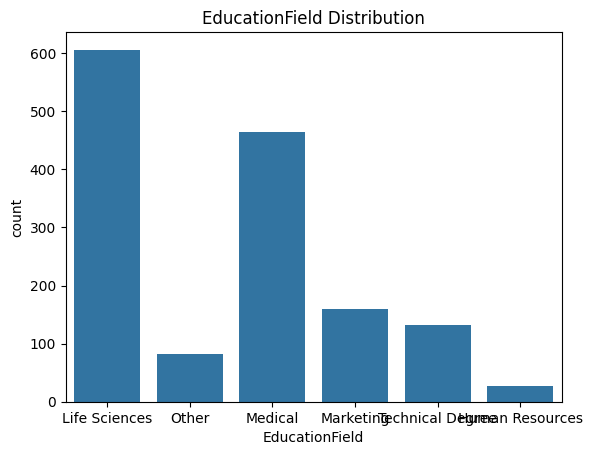

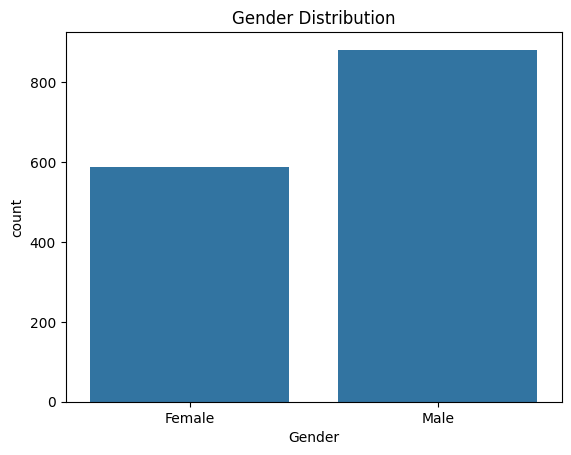

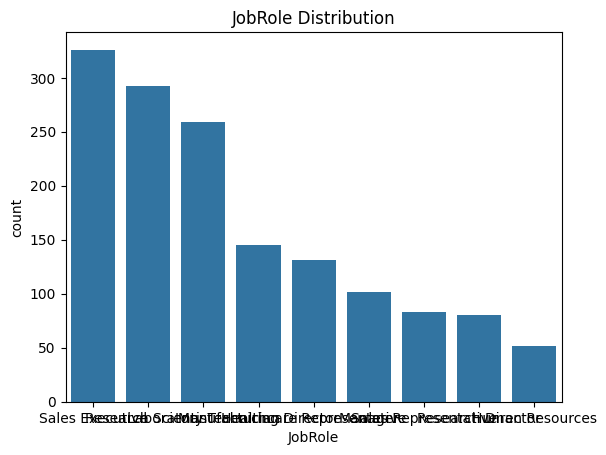

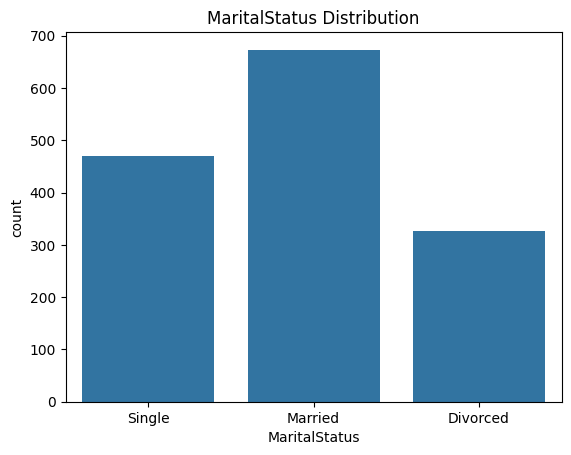

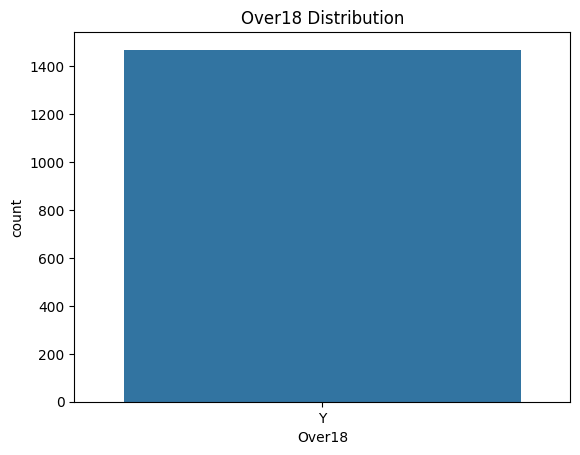

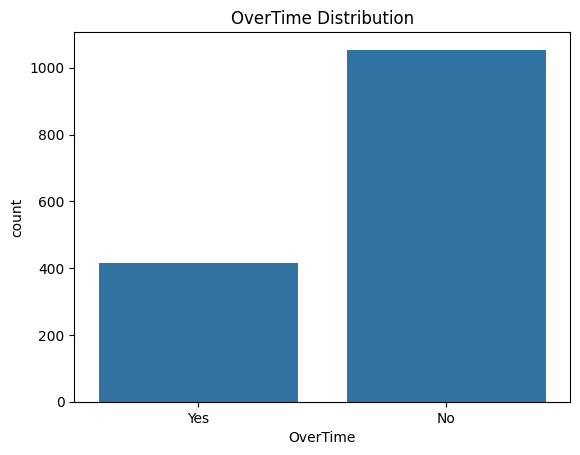

In [58]:
# Distribution of categorical features
cat_features = data.select_dtypes(include='object').columns
for feature in cat_features:
    sns.countplot(x=feature, data=data)
    plt.title(f'{feature} Distribution')
    plt.show()
    

## Data Preparation

In [59]:
# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [60]:
# Splitting features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [61]:
# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [62]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


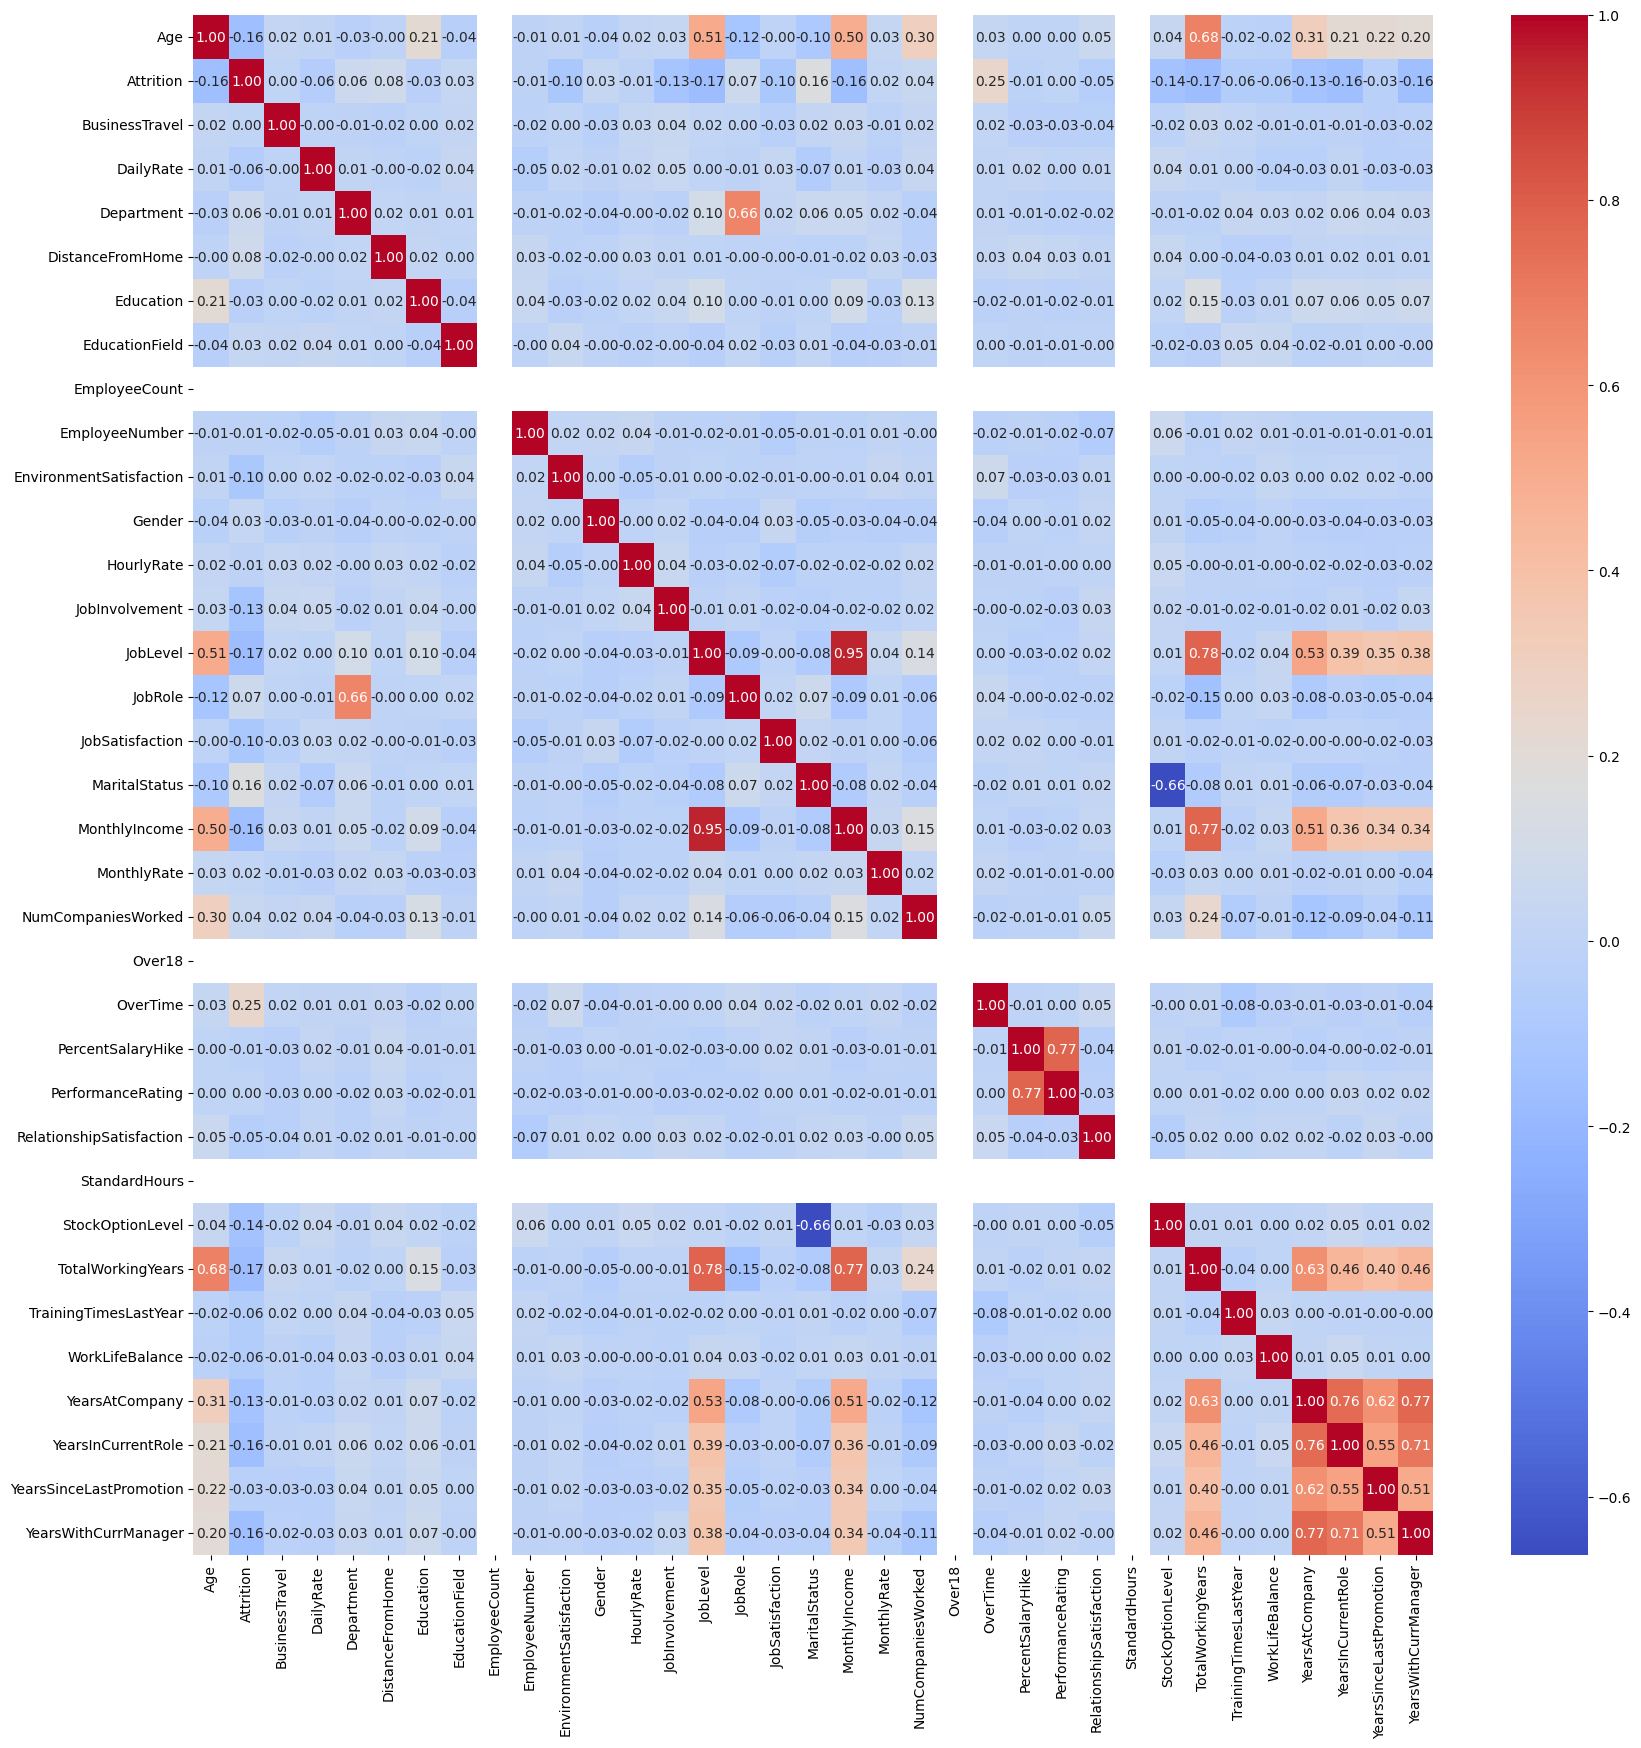

In [64]:
# Plot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Modelling and Evaluation

1. Naive Bayes Model

In [65]:
# Train the naive bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)


In [66]:
# Display the accuracy of the model
print("\nNaive Bayes Model Accuracy:", accuracy_score(y_test, nb_pred))
print("\nNaive Bayes Model Classification Report:\n", classification_report(y_test, nb_pred))


Naive Bayes Model Accuracy: 0.7246963562753036

Naive Bayes Model Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71       250
           1       0.70      0.78      0.74       244

    accuracy                           0.72       494
   macro avg       0.73      0.73      0.72       494
weighted avg       0.73      0.72      0.72       494




Naive Bayes Confusion Matrix:
 [[168  82]
 [ 54 190]]


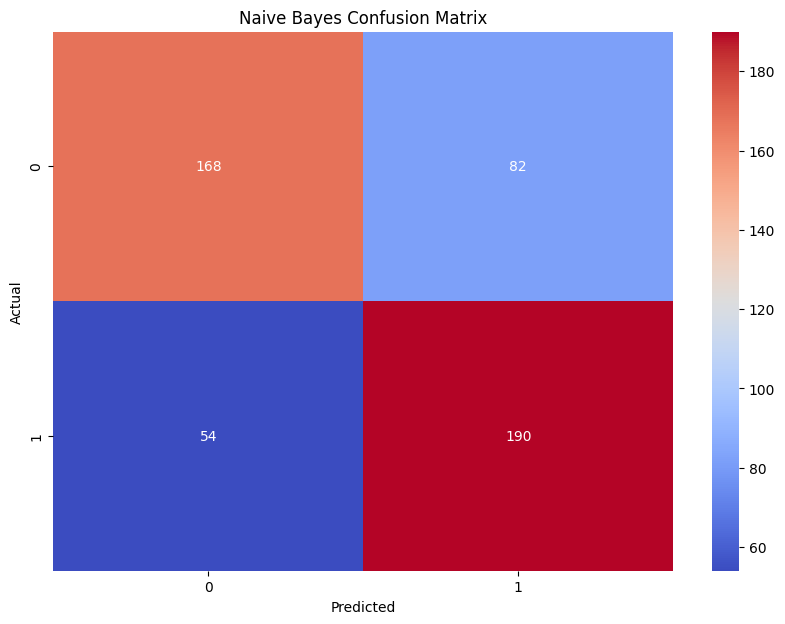

In [86]:
# Display the confusion matrix of nb model
nb_cm = confusion_matrix(y_test, nb_pred)
print("\nNaive Bayes Confusion Matrix:\n", nb_cm)

plt.figure(figsize=(10, 7))
sns.heatmap(nb_cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

2. Logistic Regression model

In [87]:
# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


In [88]:
# Display the accuracy of the model
print("\nLogistic Regression Model Accuracy:", accuracy_score(y_test, lr_pred))
print("\nLogistic Regression Model Classification Report:\n", classification_report(y_test, lr_pred))


Logistic Regression Model Accuracy: 0.8137651821862348

Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       250
           1       0.80      0.82      0.81       244

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494




Logistic Regression Confusion Matrix:
 [[201  49]
 [ 43 201]]


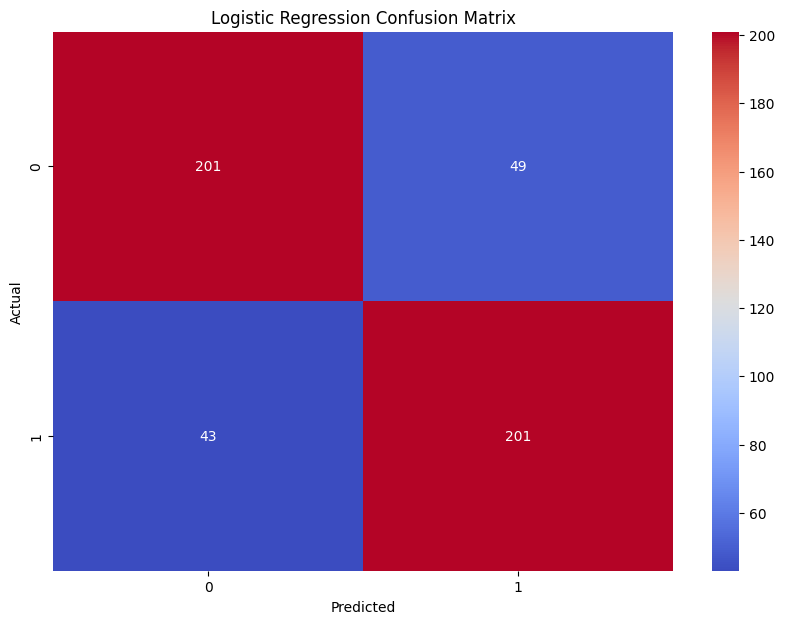

In [89]:
# Display the confusion matrix of lr model
lr_cm = confusion_matrix(y_test, lr_pred)
print("\nLogistic Regression Confusion Matrix:\n", lr_cm)

plt.figure(figsize=(10, 7))
sns.heatmap(lr_cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


3. Decision Tree Model 

In [69]:
# Train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


In [70]:
# Display the accuracy of the model
print("\nDecision Tree Model Accuracy:", accuracy_score(y_test, dt_pred))
print("\nDecision Tree Model Classification Report:\n", classification_report(y_test, dt_pred))


Decision Tree Model Accuracy: 0.8036437246963563

Decision Tree Model Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       250
           1       0.78      0.83      0.81       244

    accuracy                           0.80       494
   macro avg       0.80      0.80      0.80       494
weighted avg       0.80      0.80      0.80       494




Decision Tree Confusion Matrix:
 [[194  56]
 [ 41 203]]


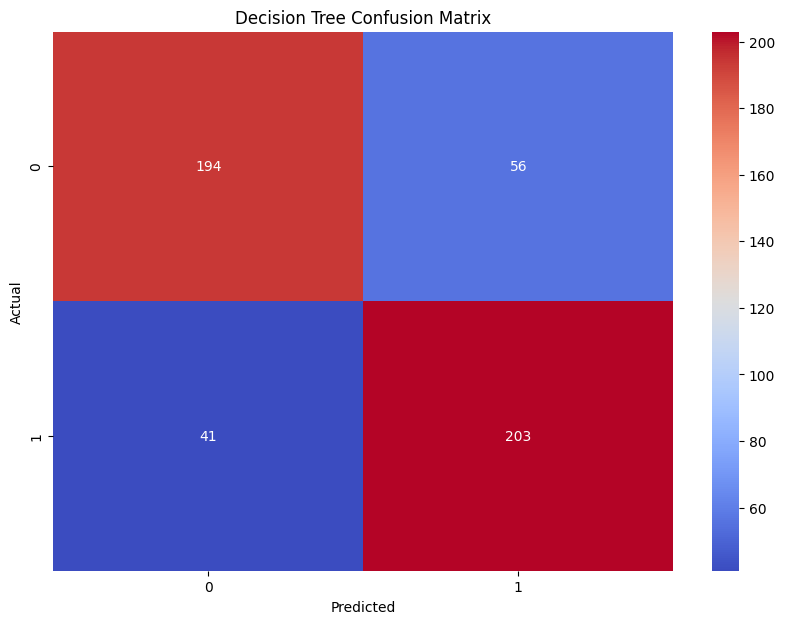

In [90]:
# Display the confusion matrix of dt model
dt_cm = confusion_matrix(y_test, dt_pred)
print("\nDecision Tree Confusion Matrix:\n", dt_cm)

plt.figure(figsize=(10, 7))
sns.heatmap(dt_cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


4. Random Forest model

In [76]:
# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [77]:
# Display the accuracy of the model
print("\nRandom Forest Model Accuracy:", accuracy_score(y_test, rf_pred))
print("\nRandom Forest Model Classification Report:\n", classification_report(y_test, rf_pred))



Random Forest Model Accuracy: 0.9068825910931174

Random Forest Model Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       250
           1       0.91      0.90      0.91       244

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494




Random Forest Confusion Matrix:
 [[228  22]
 [ 24 220]]


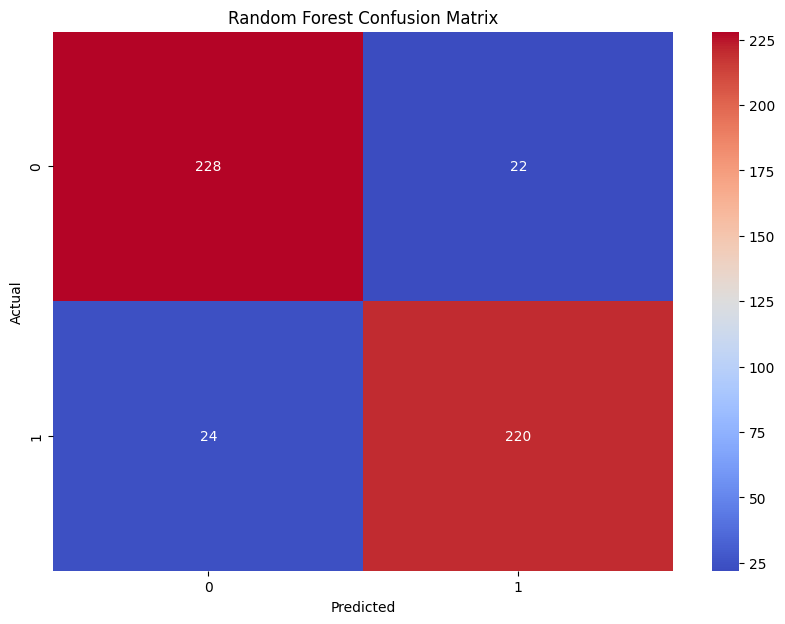

In [91]:
# Display the confusion matrix of rf model
rf_cm = confusion_matrix(y_test, rf_pred)
print("\nRandom Forest Confusion Matrix:\n", rf_cm)

plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


5. Gradient Boosting model

In [78]:
# Train the gradient boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)


In [79]:
# Display the accuracy of the model
print("\nGradient Boosting Model Accuracy:", accuracy_score(y_test, gb_pred))
print("\nGradient Boosting Model Classification Report:\n", classification_report(y_test, gb_pred))


Gradient Boosting Model Accuracy: 0.888663967611336

Gradient Boosting Model Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       250
           1       0.89      0.88      0.89       244

    accuracy                           0.89       494
   macro avg       0.89      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494




Gradient Boosting Confusion Matrix:
 [[224  26]
 [ 29 215]]


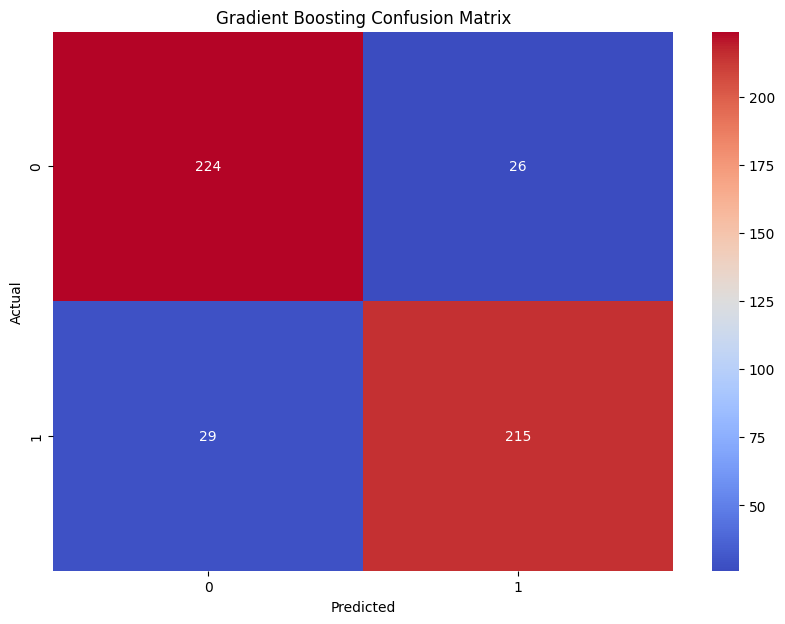

In [92]:
# Display the confusion matrix of gb model
gb_cm = confusion_matrix(y_test, gb_pred)
print("\nGradient Boosting Confusion Matrix:\n", gb_cm)

plt.figure(figsize=(10, 7))
sns.heatmap(gb_cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

6. Support Vector Machine model

In [80]:
# Train the support vector machine model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


In [81]:
# Display the accuracy of the model
print("\nSupport Vector Machine Model Accuracy:", accuracy_score(y_test, svm_pred))
print("\nSupport Vector Machine Model Classification Report:\n", classification_report(y_test, svm_pred))



Support Vector Machine Model Accuracy: 0.8846153846153846

Support Vector Machine Model Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       250
           1       0.89      0.88      0.88       244

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494




Support Vector Machine Confusion Matrix:
 [[223  27]
 [ 30 214]]


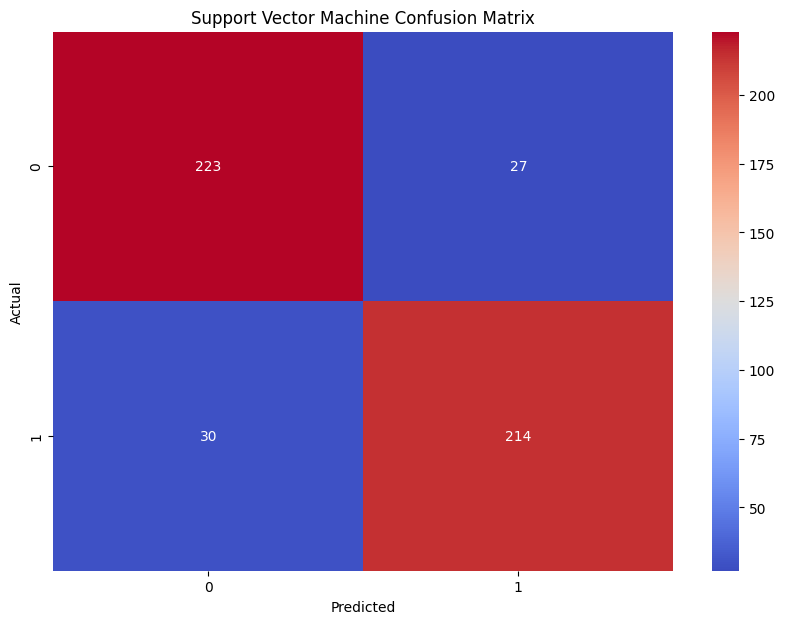

In [93]:
# Display the confusion matrix of svm model
svm_cm = confusion_matrix(y_test, svm_pred)
print("\nSupport Vector Machine Confusion Matrix:\n", svm_cm)

plt.figure(figsize=(10, 7))
sns.heatmap(svm_cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

7. Deep learning model

In [82]:
# Train the Deep learning neural network model
nn = MLPClassifier()
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [83]:
# Display the accuracy of the model
print("\nNeural Network Model Accuracy:", accuracy_score(y_test, nn_pred))
print("\nNeural Network Model Classification Report:\n", classification_report(y_test, nn_pred))




Neural Network Model Accuracy: 0.9109311740890689

Neural Network Model Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       250
           1       0.91      0.91      0.91       244

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494




Neural Network Confusion Matrix:
 [[227  23]
 [ 21 223]]


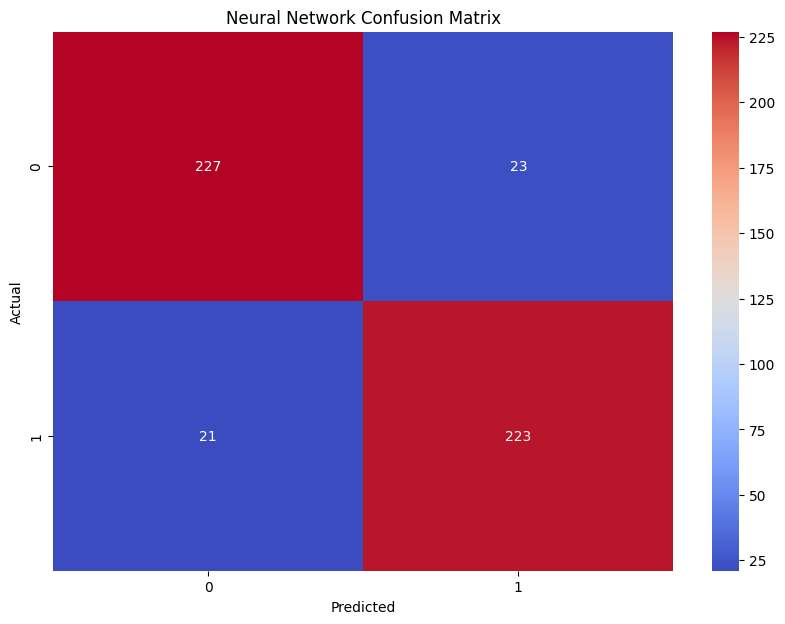

In [94]:
# Display the confusion matrix of nn model
nn_cm = confusion_matrix(y_test, nn_pred)
print("\nNeural Network Confusion Matrix:\n", nn_cm)

plt.figure(figsize=(10, 7))
sns.heatmap(nn_cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()


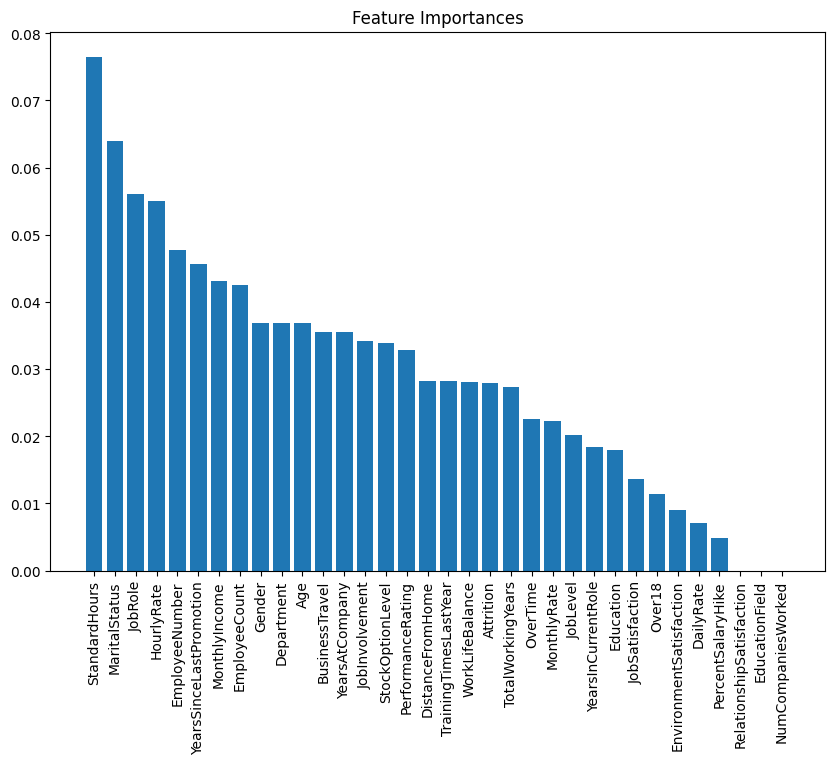

In [96]:
# Feature Importance for Tree-Based Models
features = data.columns[:-1]
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

In [97]:
# Print the accuracy of all models
print("\nNaive Bayes Model Accuracy:", accuracy_score(y_test, nb_pred))
print("\nLogistic Regression Model Accuracy:", accuracy_score(y_test, lr_pred))
print("\nDecision Tree Model Accuracy:", accuracy_score(y_test, dt_pred))
print("\nRandom Forest Model Accuracy:", accuracy_score(y_test, rf_pred))
print("\nGradient Boosting Model Accuracy:", accuracy_score(y_test, gb_pred))
print("\nSupport Vector Machine Model Accuracy:", accuracy_score(y_test, svm_pred))
print("\nNeural Network Model Accuracy:", accuracy_score(y_test, nn_pred))


Naive Bayes Model Accuracy: 0.7246963562753036

Logistic Regression Model Accuracy: 0.8137651821862348

Decision Tree Model Accuracy: 0.8036437246963563

Random Forest Model Accuracy: 0.9068825910931174

Gradient Boosting Model Accuracy: 0.888663967611336

Support Vector Machine Model Accuracy: 0.8846153846153846

Neural Network Model Accuracy: 0.9109311740890689


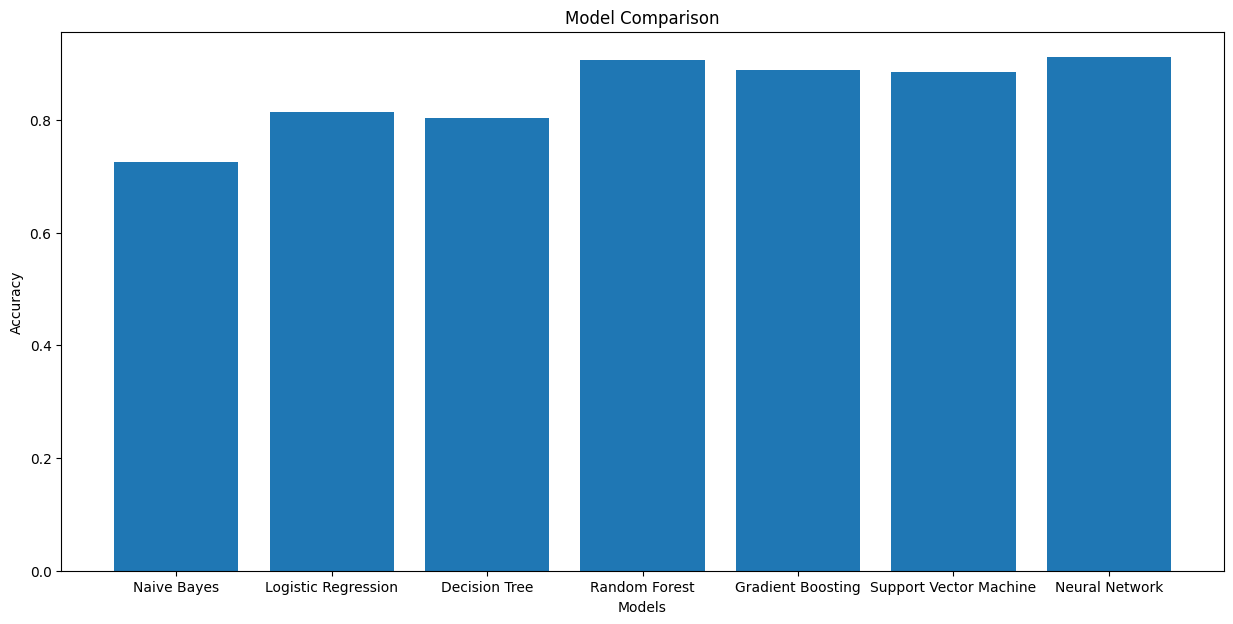

In [100]:
# plot the model comparison
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'Neural Network']
accuracy = [accuracy_score(y_test, nb_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, gb_pred), accuracy_score(y_test, svm_pred), accuracy_score(y_test, nn_pred)]
			
plt.figure(figsize=(15, 7))
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

In [102]:
import pickle

# Save the best model (Neural Network)
best_model_filename = 'best_model.pkl'
pickle.dump(nn, open(best_model_filename, 'wb'))